In [59]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1'

In [60]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [61]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [62]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


In [63]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [64]:
# Example usage:
model = Perceptron(2, 1)

In [65]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [66]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3737
Epoch [200/4000], Loss: 0.2643
Epoch [300/4000], Loss: 0.2068
Epoch [400/4000], Loss: 0.1703
Epoch [500/4000], Loss: 0.1448
Epoch [600/4000], Loss: 0.1258
Epoch [700/4000], Loss: 0.1112
Epoch [800/4000], Loss: 0.0995
Epoch [900/4000], Loss: 0.0900
Epoch [1000/4000], Loss: 0.0821
Epoch [1100/4000], Loss: 0.0754
Epoch [1200/4000], Loss: 0.0697
Epoch [1300/4000], Loss: 0.0648
Epoch [1400/4000], Loss: 0.0605
Epoch [1500/4000], Loss: 0.0568
Epoch [1600/4000], Loss: 0.0534
Epoch [1700/4000], Loss: 0.0504
Epoch [1800/4000], Loss: 0.0478
Epoch [1900/4000], Loss: 0.0454
Epoch [2000/4000], Loss: 0.0432
Epoch [2100/4000], Loss: 0.0412
Epoch [2200/4000], Loss: 0.0394
Epoch [2300/4000], Loss: 0.0377
Epoch [2400/4000], Loss: 0.0362
Epoch [2500/4000], Loss: 0.0348
Epoch [2600/4000], Loss: 0.0335
Epoch [2700/4000], Loss: 0.0322
Epoch [2800/4000], Loss: 0.0311
Epoch [2900/4000], Loss: 0.0301
Epoch [3000/4000], Loss: 0.0291
Epoch [3100/4000], Loss: 0.0281
Epoch [3200/4000]

In [67]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

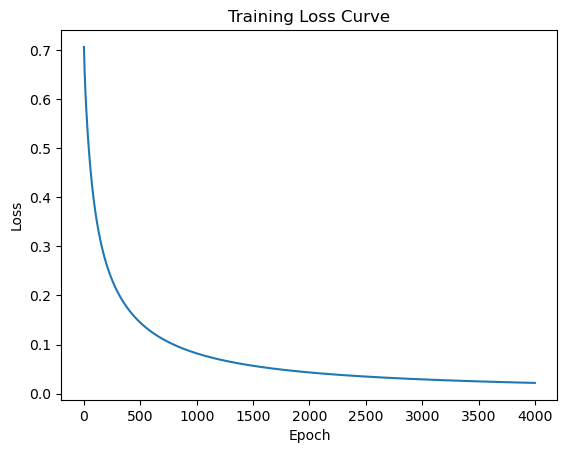

In [68]:
plot_loss(loss_values)

In [69]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4725e-05],
        [2.5290e-02],
        [2.5290e-02],
        [9.6457e-01]], grad_fn=<SigmoidBackward0>)


In [70]:
output = (test_output > 0.5).float()

In [71]:
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [72]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_perceptron.pth


In [74]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [75]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [76]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [77]:
print(f"Last 5 X features:\n{X[5:]}")
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


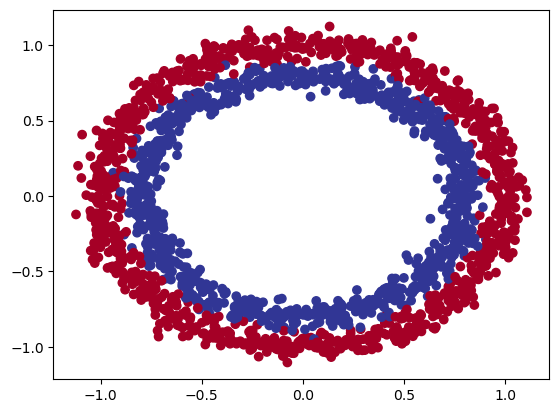

In [78]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [79]:
print(X.shape)
print(y.shape)
print(X.shape[1])
print(X[:3])
print(y[:3])

torch.Size([2000, 2])
torch.Size([2000])
2
tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175]])
tensor([1., 0., 1.])


In [80]:
from sklearn.model_selection import train_test_split
#Your code here

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, 
                    random_state=42) 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [99]:
class PerceptronTwoLayer(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(PerceptronTwoLayer, self).__init__()
        self.linear1 = torch.nn.Linear(input_dimension, output_dimension) # takes in {input_dim}  features (X), produces {output_dim} features
        self.linear2 = torch.nn.Linear(input_dimension, 1) # takes in {input_dim}  features (X), produces 2 features
        
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.activation(x)

        ## The upper line and lower are equivalent
        return x
modelTwoLayer = PerceptronTwoLayer(2, 2)
y_train = torch.reshape(y_train, (1600, 1))
y_test = torch.reshape(y_test, (400, 1))

num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = modelTwoLayer(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/4000], Loss: 0.7337
Epoch [200/4000], Loss: 0.7337
Epoch [300/4000], Loss: 0.7337
Epoch [400/4000], Loss: 0.7337
Epoch [500/4000], Loss: 0.7337
Epoch [600/4000], Loss: 0.7337
Epoch [700/4000], Loss: 0.7337
Epoch [800/4000], Loss: 0.7337
Epoch [900/4000], Loss: 0.7337
Epoch [1000/4000], Loss: 0.7337
Epoch [1100/4000], Loss: 0.7337
Epoch [1200/4000], Loss: 0.7337
Epoch [1300/4000], Loss: 0.7337
Epoch [1400/4000], Loss: 0.7337
Epoch [1500/4000], Loss: 0.7337
Epoch [1600/4000], Loss: 0.7337
Epoch [1700/4000], Loss: 0.7337
Epoch [1800/4000], Loss: 0.7337
Epoch [1900/4000], Loss: 0.7337
Epoch [2000/4000], Loss: 0.7337
Epoch [2100/4000], Loss: 0.7337
Epoch [2200/4000], Loss: 0.7337
Epoch [2300/4000], Loss: 0.7337
Epoch [2400/4000], Loss: 0.7337
Epoch [2500/4000], Loss: 0.7337
Epoch [2600/4000], Loss: 0.7337
Epoch [2700/4000], Loss: 0.7337
Epoch [2800/4000], Loss: 0.7337
Epoch [2900/4000], Loss: 0.7337
Epoch [3000/4000], Loss: 0.7337
Epoch [3100/4000], Loss: 0.7337
Epoch [3200/4000]

In [100]:
import torch.optim as optim
import torch.nn as nn

# Define the BCEWithLogitsLoss() loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [105]:
test_output = modelTwoLayer(X_test)

#print(test_output)
output = (test_output > 0.5).float()
print(output)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [106]:
from utils import plot_decision_boundary

Epoch [10/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [20/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [30/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [40/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [50/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [60/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [70/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [80/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [90/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [100/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [110/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [120/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [130/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [140/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [150/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [160/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [170/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [180/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [190/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [200/4000], Loss: 0.7337, Accuracy: 0.4981
Epoch [210/4000], Loss: 0.733

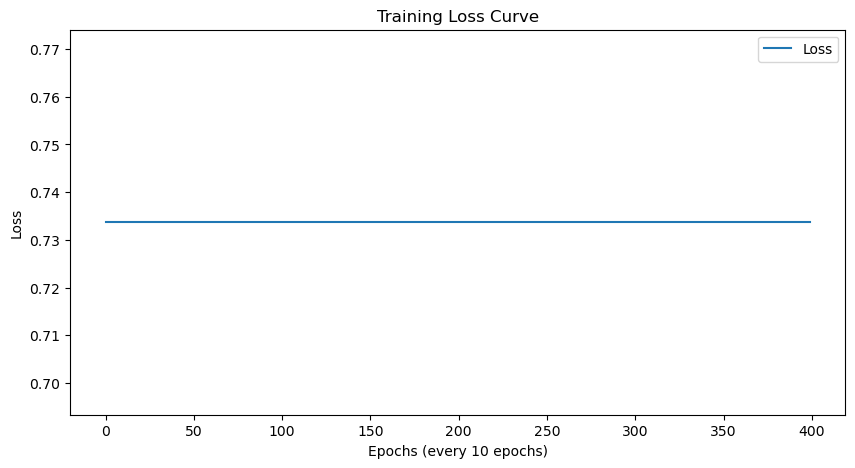

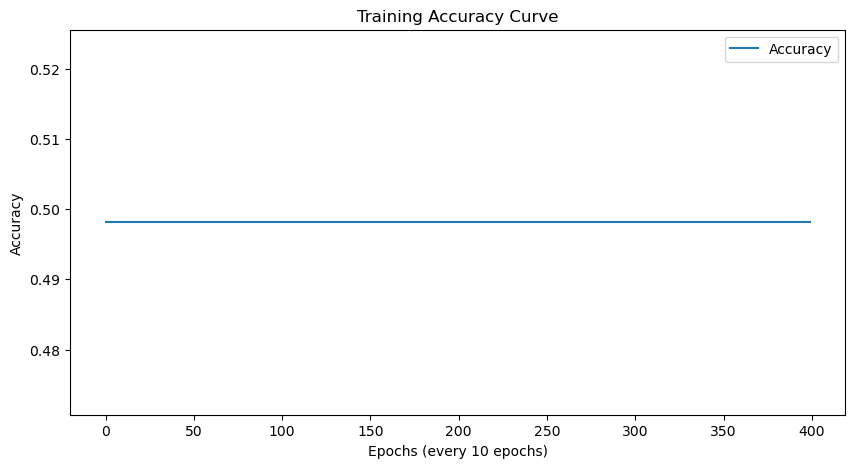

In [107]:
import matplotlib.pyplot as plt

num_epochs = 4000
loss_values = []
accuracy_values = []
loss_curve = []
acc_curve = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = modelTwoLayer(X_train)
    # y_pred = y_pred.squeeze()
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    # Compute accuracy
    y_pred_binary = (y_pred > 0.5).float()  # Assuming binary classification
    accuracy = ((y_pred_binary == y_train).sum().item()) / len(y_train)
   
    
    # Print the loss and accuracy every 10 epochs
    loss_values.append(loss.item())
    accuracy_values.append(accuracy)
    if (epoch + 1) % 10 == 0:
        loss_curve.append(loss.item())
        acc_curve.append(accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_curve)), loss_curve, label='Loss')
plt.xlabel('Epochs (every 10 epochs)')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(acc_curve)), acc_curve, label='Accuracy')
plt.xlabel('Epochs (every 10 epochs)')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()
plt.show()


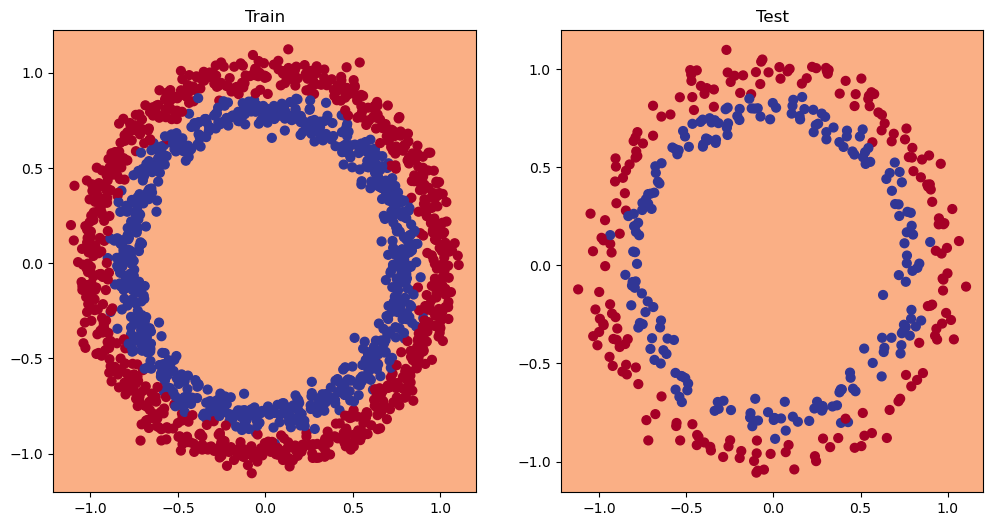

In [108]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(modelTwoLayer, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(modelTwoLayer, X_test, y_test)

In [109]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [110]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

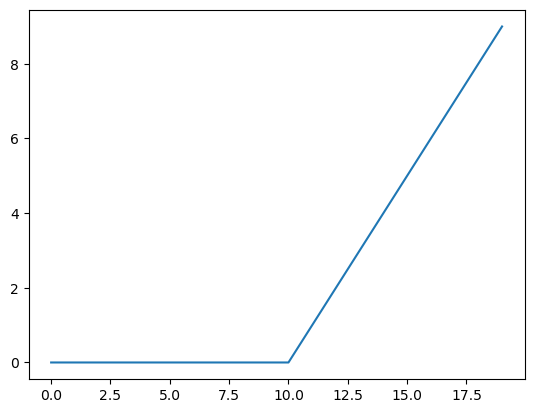

In [111]:
plt.plot(relu(input_dummy))

In [124]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming X_train and y_train are already tensors
X_train = X_train.to(device)
y_train = y_train.to(device)
model_relu = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid()
).to(device)

In [125]:
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_relu.parameters(), lr=0.1)
device = "cuda" if torch.cuda.is_available() else "cpu"

loss_curve = []
acc_curve = []
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model_relu(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    # Print the loss every 10 epochs
    loss_curve.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.6093
Epoch [20/1000], Loss: 0.5184
Epoch [30/1000], Loss: 0.3546
Epoch [40/1000], Loss: 0.2123
Epoch [50/1000], Loss: 0.1377
Epoch [60/1000], Loss: 0.1043
Epoch [70/1000], Loss: 0.0882
Epoch [80/1000], Loss: 0.0792
Epoch [90/1000], Loss: 0.0747
Epoch [100/1000], Loss: 0.0713
Epoch [110/1000], Loss: 0.0691
Epoch [120/1000], Loss: 0.0674
Epoch [130/1000], Loss: 0.0662
Epoch [140/1000], Loss: 0.0652
Epoch [150/1000], Loss: 0.0644
Epoch [160/1000], Loss: 0.0638
Epoch [170/1000], Loss: 0.0633
Epoch [180/1000], Loss: 0.0628
Epoch [190/1000], Loss: 0.0627
Epoch [200/1000], Loss: 0.0623
Epoch [210/1000], Loss: 0.0620
Epoch [220/1000], Loss: 0.0618
Epoch [230/1000], Loss: 0.0617
Epoch [240/1000], Loss: 0.0616
Epoch [250/1000], Loss: 0.0614
Epoch [260/1000], Loss: 0.0613
Epoch [270/1000], Loss: 0.0612
Epoch [280/1000], Loss: 0.0612
Epoch [290/1000], Loss: 0.0611
Epoch [300/1000], Loss: 0.0611
Epoch [310/1000], Loss: 0.0610
Epoch [320/1000], Loss: 0.0610
Epoch [330/1000],

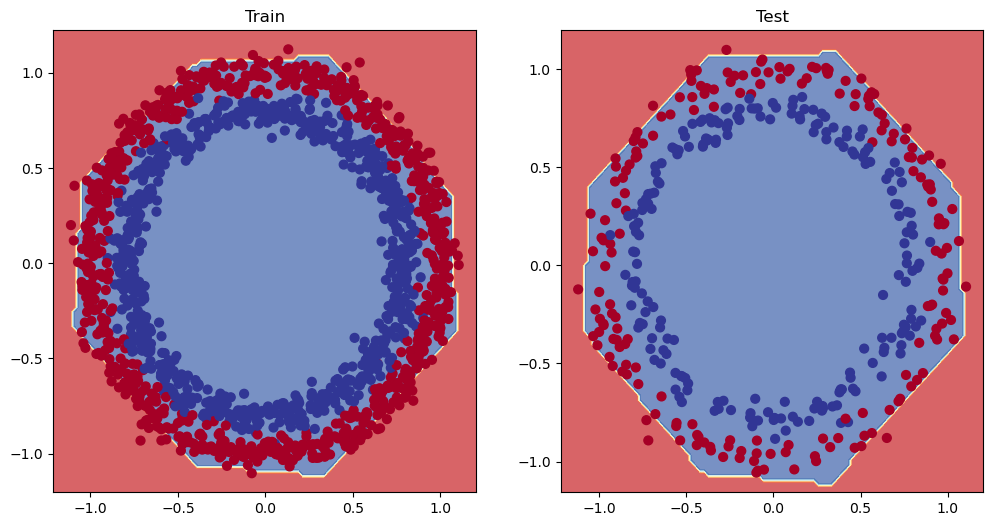

In [126]:
# Ex 8 Evaluate visual
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_relu, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_relu, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


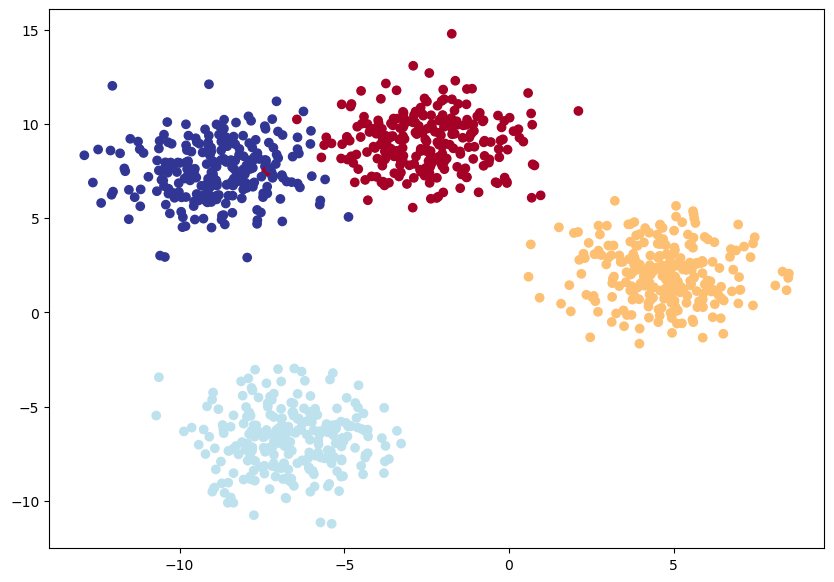

In [54]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [55]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


class PerceptronTwoLayer(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(PerceptronTwoLayer, self).__init__()
        self.layer1 = torch.nn.Linear(input_dimension, 10) # takes in {input_dim}  features (X), produces {output_dim} features
        self.layer2 = torch.nn.Linear(10, 10) # takes in {input_dim}  features (X), produces 2 features
        self.layer3 = torch.nn.Linear(10, output_dimension) # takes in {input_dim}  features (X), produces 2 features
        self.activation1 = torch.nn.Tanh()
        self.activation2 = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
model_circle = PerceptronTwoLayer(2, 4)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1)

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)


num_epochs = 10000
loss_values = []
acc_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model_circle(X_blob_train)
    loss = criterion(y_pred, y_blob_train )
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) # This is so that we can look at an image of our loss
        #acc_values.append(accuracy_fn(y_blob_train, y_pred))
    
    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.0239
Epoch [2000/10000], Loss: 0.0221
Epoch [3000/10000], Loss: 0.0208
Epoch [4000/10000], Loss: 0.0198
Epoch [5000/10000], Loss: 0.0189
Epoch [6000/10000], Loss: 0.0183
Epoch [7000/10000], Loss: 0.0178
Epoch [8000/10000], Loss: 0.0175
Epoch [9000/10000], Loss: 0.0173
Epoch [10000/10000], Loss: 0.0172


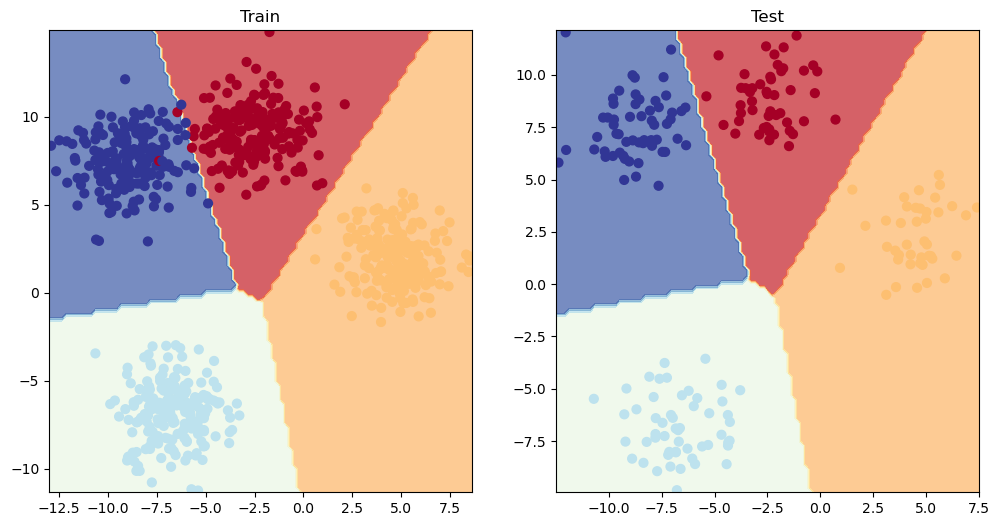

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_blob_test, y_blob_test)